In [3]:
import pandas as pd
import numpy as np
import skbio
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
import researchpy as rp
from matplotlib import rcParams
#from statsmodels.stats.multicomp import pairwise_tukeyhsd
#from statsmodels.stats.multicomp import MultiComparison
#dunns
from itertools import combinations
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.libqsturng import psturng
import warnings

import plotly.express as px
import plotly.graph_objects as go
import os
import re
from plotly.subplots import make_subplots

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import statsmodels.api as sm

import statsmodels.api as sa
import scikit_posthocs as sp

from statannot import add_stat_annotation

from pingouin import kruskal

rcParams.update({'figure.autolayout': True})

In [4]:
finaldate = '27.11.20'

In [5]:
if not os.path.exists(f'../../../../data/plots/luminescence/{finaldate}'):
    os.mkdir(f'../../../../data/plots/luminescence/{finaldate}')

In [6]:
luminescence_raw_date = f'../../../../data/luminescence/to_be_sorted/{finaldate}/output_raw.csv'
#luminescence_raw_date2 = f'../../../../data/luminescence/to_be_sorted/{finaldate}/output_raw_{date2}.csv'

In [7]:
luminescence_raw_df_date = pd.read_csv(luminescence_raw_date, header=0)


In [8]:
luminescence_raw_df_date

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,nluc/fluc,date
0,A,1,Sample X1,174269.0,35951920.0,71+34,Co-expression,206.301293,27.11.20
1,B,1,Sample X2,52333.0,3196937.0,35+34,Co-expression,61.088357,27.11.20
2,C,1,Sample X3,180846.0,139255.0,102+34,Co-expression,0.770020,27.11.20
3,D,1,Sample X4,91812.0,55424.0,103+34,Co-expression,0.603668,27.11.20
4,E,1,Sample X5,106039.0,47411.0,104+34,Co-expression,0.447109,27.11.20
...,...,...,...,...,...,...,...,...,...
79,D,11,Sample X80,16191.0,949868.0,71+29+111+34,Co-expression,58.666420,27.11.20
80,A,12,Sample X81,5975.0,87009.0,109+111+34,Co-expression,14.562176,27.11.20
81,B,12,Sample X82,30171.0,7997612.0,71+111+34,Co-expression,265.076133,27.11.20
82,C,12,Sample X83,6683.0,1441505.0,71+29+34,Co-expression,215.697292,27.11.20


In [9]:
#add promoter names column
luminescence_raw_df_date['Promoter'] = luminescence_raw_df_date.name 

In [10]:
# luminescence_raw_df.loc[luminescence_raw_df.name == '71 + 72', 'Promoter'] = 'UBQ10'
# luminescence_raw_df.loc[luminescence_raw_df.name == '71+72', 'Promoter'] = 'UBQ10'
# luminescence_raw_df.loc[luminescence_raw_df.name == '25+72', 'Promoter'] = 'NIR1'
# luminescence_raw_df.loc[luminescence_raw_df.name == '35+72', 'Promoter'] = 'NOS'
# luminescence_raw_df.loc[luminescence_raw_df.name == '36+72', 'Promoter'] = 'STAP4'
# luminescence_raw_df.loc[luminescence_raw_df.name == '92+72', 'Promoter'] = 'NRP'
# luminescence_raw_df.loc[luminescence_raw_df.name == '92+29+72', 'Promoter'] = 'NRP+NLP7_TF'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '25 + 34', 'Promoter'] = 'NIR1(1000bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '35 + 34', 'Promoter'] = 'NOS'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '36 + 34', 'Promoter'] = 'STAP4'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '70 + 34', 'Promoter'] = '35S'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '14 + 34', 'Promoter'] = 'ANAC032(1000bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '13 + 34', 'Promoter'] = 'ANAC032(500bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '15 + 34', 'Promoter'] = 'ANR1(500bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '16 + 34', 'Promoter'] = 'ANR1(1000bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '17 + 34', 'Promoter'] = 'ARF18(500bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '18 + 34', 'Promoter'] = 'ARF18(1000bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '21 + 34', 'Promoter'] = 'DREB26(500bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '22 + 34', 'Promoter'] = 'DREB26(1000bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '23 + 34', 'Promoter'] = 'NLP7(500bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '24 + 34', 'Promoter'] = 'NLP7(1000bp)'
# luminescence_raw_df_date1.loc[luminescence_raw_df_date1.name == '14+30+34', 'Promoter'] = 'ANAC032)'

luminescence_raw_df_date.loc[luminescence_raw_df_date.name.str.match(r'(^14.*)')==True, 'Promoter'] = 'ANAC032'
luminescence_raw_df_date.loc[luminescence_raw_df_date.name.str.match(r'(^16.*)')==True, 'Promoter'] = 'ANR1'
luminescence_raw_df_date.loc[luminescence_raw_df_date.name.str.match(r'(^18.*)')==True, 'Promoter'] = 'ARF18'
luminescence_raw_df_date.loc[luminescence_raw_df_date.name.str.match(r'(^20.*)')==True, 'Promoter'] = 'NLP6'
luminescence_raw_df_date.loc[luminescence_raw_df_date.name.str.match(r'(^22.*)')==True, 'Promoter'] = 'DREB26'
luminescence_raw_df_date.loc[luminescence_raw_df_date.name.str.match(r'(^24.*)')==True, 'Promoter'] = 'NLP7'
luminescence_raw_df_date.loc[luminescence_raw_df_date.name.str.match(r'(^25.*)')==True, 'Promoter'] = 'NIR1(1000bp)'
luminescence_raw_df_date.loc[luminescence_raw_df_date.name.str.match(r'(^35.*)')==True, 'Promoter'] = 'NOS'
luminescence_raw_df_date.loc[luminescence_raw_df_date.name.str.match(r'(^36.*)')==True, 'Promoter'] = 'STAP4'
luminescence_raw_df_date.loc[luminescence_raw_df_date.name.str.match(r'(^70.*)')==True, 'Promoter'] = '35S'
luminescence_raw_df_date.loc[luminescence_raw_df_date.name.str.match(r'(^102.*)')==True, 'Promoter'] = 'minimal_STAP4'
luminescence_raw_df_date.loc[luminescence_raw_df_date.name.str.match(r'(^103.*)')==True, 'Promoter'] = '1xANR1'
luminescence_raw_df_date.loc[luminescence_raw_df_date.name.str.match(r'(^104.*)')==True, 'Promoter'] = '1xNLP7'
luminescence_raw_df_date.loc[luminescence_raw_df_date.name.str.match(r'(^105.*)')==True, 'Promoter'] = '1xTCP20+NLP7'
luminescence_raw_df_date.loc[luminescence_raw_df_date.name.str.match(r'(^106.*)')==True, 'Promoter'] = '4xANR1'
luminescence_raw_df_date.loc[luminescence_raw_df_date.name.str.match(r'(^107.*)')==True, 'Promoter'] = '4xNLP7'
luminescence_raw_df_date.loc[luminescence_raw_df_date.name.str.match(r'(^108.*)')==True, 'Promoter'] = '4xTCP20+NLP7'
luminescence_raw_df_date.loc[luminescence_raw_df_date.name.str.match(r'(^109.*)')==True, 'Promoter'] = '4xNRE'
luminescence_raw_df_date.loc[luminescence_raw_df_date.name.str.match(r'(^71.*)')==True, 'Promoter'] = 'UBQ10'

#luminescence_raw_df.locluminescence_raw_df.name == '71 + 34', 'Promoter'] = 'UBQ10:LucN/35S:LucF'

In [11]:
def add_promoter_column(df,promoter_number,promoter):
    df.loc[df.name.str.match(fr'(^{promoter_number}.*)')==True, 'Promoter'] = promoter
    

In [12]:
#add TF coexpression column
def add_tf_column(df, TF_number, TF):
    """function to add TF added column based on an input df, a TF_number and a TF name"""
    df.loc[df.name.str.contains(fr'.*{TF_number}.*')&df.TF_added.isnull()==True, 'TF_added'] = TF
    for index, value in df.loc[df.name.str.contains(fr'.*{TF_number}.*')&df.TF_added.notnull()].TF_added.items():
        if re.match(fr'.*{TF}.*', value):
            pass
        else:
            df.iloc[index, df.columns.get_loc('TF_added')] = f'{value}+{TF}'


In [13]:
#divide by NOS calibrator (mean nos-LucN/35SLucF luminescence)
def batch_correction(df,calibrator_promoter_name):
   #print(df[df.Promoter==calibrator_promoter_name])
    calibrator = df[df.Promoter==calibrator_promoter_name]
    calibrator_mean = calibrator['nluc/fluc'].mean(axis=0)
    df['corrected_luminescence'] = df['nluc/fluc']/calibrator_mean*100 

In [14]:
#add promoters to df
add_promoter_column(luminescence_raw_df_date, '14', 'ANAC032')
add_promoter_column(luminescence_raw_df_date, '16', 'ANR1')
add_promoter_column(luminescence_raw_df_date, '18', 'ARF18')
add_promoter_column(luminescence_raw_df_date, '20', 'NLP6')
add_promoter_column(luminescence_raw_df_date, '22', 'DREB26')
add_promoter_column(luminescence_raw_df_date, '24', 'NLP7')
add_promoter_column(luminescence_raw_df_date, '25', 'NIR1')
add_promoter_column(luminescence_raw_df_date, '35', 'NOS')
add_promoter_column(luminescence_raw_df_date, '36', 'STAP4')
add_promoter_column(luminescence_raw_df_date, '102', 'minimal_STAP4')
add_promoter_column(luminescence_raw_df_date, '103', '1xANR1')
add_promoter_column(luminescence_raw_df_date, '104', '1xNLP7')
add_promoter_column(luminescence_raw_df_date, '105', '1xTCP20+NLP7')
add_promoter_column(luminescence_raw_df_date, '106', '4xANR1')
add_promoter_column(luminescence_raw_df_date, '107', '4xNLP7')
add_promoter_column(luminescence_raw_df_date, '108', '4xTCP20+NLP7')
add_promoter_column(luminescence_raw_df_date, '109', '4xNRE')
add_promoter_column(luminescence_raw_df_date, '71', 'UBQ10')

In [15]:
# #add promoters to date2 df
# add_promoter_column(luminescence_raw_df_date2, '14', 'ANAC032')
# add_promoter_column(luminescence_raw_df_date2, '16', 'ANR1')
# add_promoter_column(luminescence_raw_df_date2, '18', 'ARF18')
# add_promoter_column(luminescence_raw_df_date2, '20', 'NLP6')
# add_promoter_column(luminescence_raw_df_date2, '22', 'DREB26')
# add_promoter_column(luminescence_raw_df_date2, '24', 'NLP7')
# add_promoter_column(luminescence_raw_df_date2, '25', 'NIR1')
# add_promoter_column(luminescence_raw_df_date2, '35', 'NOS')
# add_promoter_column(luminescence_raw_df_date2, '36', 'STAP4')
# add_promoter_column(luminescence_raw_df_date2, '70', '35S')

In [16]:
#add TF column to df
luminescence_raw_df_date['TF_added'] = np.nan
add_tf_column(luminescence_raw_df_date,'27','NLP6')
add_tf_column(luminescence_raw_df_date,'29','NLP7')
add_tf_column(luminescence_raw_df_date,'30','DREB26')
add_tf_column(luminescence_raw_df_date,'31','ANAC032')
add_tf_column(luminescence_raw_df_date,'32','ARF18')
add_tf_column(luminescence_raw_df_date,'33','ANR1')
add_tf_column(luminescence_raw_df_date,'111','TCP20')

In [17]:
# #add TF column to date2 df
# luminescence_raw_df_date2['TF_added'] = np.nan
# add_tf_column(luminescence_raw_df_date2,'27','NLP6')
# add_tf_column(luminescence_raw_df_date2,'29','NLP7')
# add_tf_column(luminescence_raw_df_date2,'30','DREB26')
# add_tf_column(luminescence_raw_df_date2,'31','ANAC032')
# add_tf_column(luminescence_raw_df_date2,'32','ARF18')
# add_tf_column(luminescence_raw_df_date2,'33','ANR1')

In [18]:
#divide by NOS calibrator (mean nos-LucN/35SLucF luminescence)
batch_correction(luminescence_raw_df_date, 'NOS')
# batch_correction(luminescence_raw_df_date2, 'NOS')

In [19]:
luminescence_raw_df = luminescence_raw_df_date.copy()

In [20]:
# #merge the dfs with different dates
# luminescence_raw_df = pd.concat([luminescence_raw_df_date1,luminescence_raw_df_date2],ignore_index=True)
# luminescence_raw_df

In [21]:
#Change TF_added NaN values to none
luminescence_raw_df.loc[luminescence_raw_df.TF_added.isnull()==True, 'TF_added'] = 'No TF'

In [22]:
#sort rows by the custom promoter order I want so plots are in the correct order
luminescence_raw_df.Promoter = pd.Categorical(luminescence_raw_df.Promoter,
                                              ['NOS','minimal_STAP4','UBQ10','4xNRE','1xANR1','4xANR1','1xTCP20+NLP7','4xTCP20+NLP7', '1xNLP7', '4xNLP7', 'NIR1'])
luminescence_raw_df = luminescence_raw_df.sort_values("Promoter")

In [23]:
#save as file
location = f'../../../../data/luminescence/to_be_sorted/{finaldate}/combined_output.tsv'

luminescence_raw_df.to_csv(location,sep='\t',header=True)

In [24]:
# #set style to ticks
# sns.set(style="ticks", color_codes=True)

In [25]:
# import plotly.plotly as py
# import plotly.graph_objs as go
# from plotly import tools

# trace1 = Bar(
#     x=['giraffes', 'orangutans', 'monkeys'],
#     y=[20, 14, 23],
#     name='SF Zoo'
# )
# trace2 = Bar(
#     x=['giraffes', 'orangutans', 'monkeys'],
#     y=[12, 18, 29],
#     name='LA Zoo'
# )
# trace3 = Scatter(
#   x=['giraffes', 'orangutans', 'monkeys']
#   ,y=[33,20,17]
#   ,name='subplots ftw'
#   )


# fig = tools.make_subplots(rows=2, cols=1, shared_xaxes=True)

# fig.append_trace(trace3, 1,1)
# fig.append_trace(trace1, 2, 1)
# fig.append_trace(trace2,2,1)


# fig['layout'].update(height=600, width=600)
# iplot(fig)

In [26]:
# # df = luminescence_raw_df.sort_values("Promoter")
# fig = make_subplots(rows=1, cols=2,shared_xaxes=True)
# trace1 = px.bar(df, y=df[df.Promoter=='NOS'].corrected_luminescence, x=df[df.Promoter=='NOS'].Promoter)
# fig.append_trace(trace1,1, 1)
# fig['layout'].update(height=600, width=600)

In [27]:
# df = luminescence_raw_df.sort_values("Promoter")
# trace1 = px.bar(df, y=df[df.Promoter=='NOS'].corrected_luminescence, x=df[df.Promoter=='NOS'].Promoter)
# fig.add_trace(trace1.data[0])
# fig['layout'].update(height=600, width=600)
# fig.show()

In [28]:
# #layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)' )

# fig = px.bar(luminescence_raw_df.sort_values("Promoter"), y="corrected_luminescence",barmode='group', x="Promoter", color="TF_added",  hover_data=luminescence_raw_df.columns) #points="all"

# fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
# fig.update_xaxes(showline=True, linewidth=1, linecolor='black',ticks="outside")
# fig.update_yaxes(showline=True, linewidth=1, linecolor='black',ticks="outside", title_text='Mean_luminescence')
# #write to file static image and interactive one
# #fig.write_image(f'../../../../data/plots/luminescence/{date}/violin23.9.19.pdf')
# #fig.write_html(f'../../../../data/plots/luminescence/{date}/violin23.9.19.html')

# fig.show()

In [29]:
# #layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)' )
# fig = px.violin(luminescence_raw_df.sort_values("Promoter"), y="corrected_luminescence", x="Promoter", color="TF_added", box=True, hover_data=luminescence_raw_df.columns) #points="all"

# fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
# fig.update_xaxes(showline=True, linewidth=1, linecolor='black',ticks="outside")
# fig.update_yaxes(showline=True, linewidth=1, linecolor='black',ticks="outside", title_text='Mean_luminescence')
# #write to file static image and interactive one
# #fig.write_image(f'../../../../data/plots/luminescence/{date}/violin23.9.19.pdf')
# #fig.write_html(f'../../../../data/plots/luminescence/{date}/violin23.9.19.html')

# fig.show()

In [30]:

# fig = go.Figure()
# df = luminescence_raw_df.sort_values("Promoter")
# fig.add_trace(go.Violin(x=df['Promoter'][ df['condition'] == '10 mM KNO3 in W5' ],
#                         y=df['nluc/fluc'][ df['condition'] == '10 mM KNO3 in W5' ],
#                         legendgroup='10 mM KNO3 in W5', scalegroup='10 mM KNO3 in W5', name='10 mM KNO3 in W5',
#                         line_color='blue')
#              )
# fig.add_trace(go.Violin(x=df['Promoter'][ df['condition'] == 'W5' ],
#                         y=df['nluc/fluc'][ df['condition'] == 'W5' ],
#                         legendgroup='W5', scalegroup='W5', name='W5',
#                         line_color='orange')
#              )

# fig.update_traces(box_visible=True, meanline_visible=True)
# fig.update_layout(violinmode='group')
# fig.show()


In [31]:
# df = luminescence_raw_df.sort_values("Promoter")
# #set figure size

# sns.set(rc={'figure.figsize':(8,6)}, style="ticks", color_codes=True)
# #bar chart, 95% confidence intervals
# plot = sns.barplot(x="TF_added", y="corrected_luminescence",hue='Promoter',data=df, ci=95, capsize=0.1,errwidth=0.7,n_boot=10000,
#                    )
# plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
# #plt.legend(loc='upper right', borderaxespad=0.)
# plt.ylabel("Mean_luminescence") #.get_figure().savefig(f'../../../../data/plots/luminescence/{date}/promoter_luminescence.pdf', format='pdf')

In [32]:
# plot = sns.catplot(x="Promoter", y="nluc/fluc", data=luminescence_raw_df, hue='condition', kind='violin',
#                    order=['NOS','STAP4','NIR1(1000bp)','ANAC032(1000bp)','ANR1(500bp)','ANR1(1000bp)', 'ARF18(500bp)','ARF18(1000bp)', 'DREB26(500bp)', 'DREB26(1000bp)','NLP7(500bp)', 'NLP7(1000bp)'])
# #plot points
# [plt.setp(ax.get_xticklabels(), rotation=45, ha='right') for ax in plot.axes.flat]

# #ax = sns.swarmplot(x="Promoter", y="nluc/fluc", data=luminescence_raw_df, color=".25",
#              #      order=['NOS','STAP4','NIR1(1000bp)','ANAC032(1000bp)','ANR1(500bp)','ANR1(1000bp)', 'ARF18(500bp)','ARF18(1000bp)', 'DREB26(500bp)', 'DREB26(1000bp)','NLP7(500bp)', 'NLP7(1000bp)']).get_figure().savefig(f'../../../../data/plots/luminescence/{date}/luminescence_violin.pdf', format='pdf')


In [33]:
luminescence_raw_df

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,nluc/fluc,date,Promoter,TF_added,corrected_luminescence
1,B,1,Sample X2,52333.0,3196937.0,35+34,Co-expression,61.088357,27.11.20,NOS,No TF,58.124607
9,B,2,Sample X10,12157.0,1963686.0,35+34,Co-expression,161.527186,27.11.20,NOS,No TF,153.690567
17,B,3,Sample X18,18386.0,1704039.0,35+34,Co-expression,92.681334,27.11.20,NOS,No TF,88.184826
2,C,1,Sample X3,180846.0,139255.0,102+34,Co-expression,0.770020,27.11.20,minimal_STAP4,No TF,0.732662
10,C,2,Sample X11,55755.0,24776.0,102+34,Co-expression,0.444373,27.11.20,minimal_STAP4,No TF,0.422814
...,...,...,...,...,...,...,...,...,...,...,...,...
64,A,9,Sample X65,9321.0,246446.0,107+29+34,Co-expression,26.439867,27.11.20,4xNLP7,NLP7,25.157116
56,A,8,Sample X57,14505.0,461986.0,107+29+34,Co-expression,31.850121,27.11.20,4xNLP7,NLP7,30.304887
57,B,8,Sample X58,19385.0,535792.0,107+111+29+34,Co-expression,27.639515,27.11.20,4xNLP7,NLP7+TCP20,26.298562
23,H,3,Sample X24,18249.0,146027.0,107+34,Co-expression,8.001918,27.11.20,4xNLP7,No TF,7.613699


In [32]:
# #add plus sign to TF column if not 'No TF)
# luminescence_raw_df_renamed = luminescence_raw_df.copy()

# filter = luminescence_raw_df_renamed[~luminescence_raw_df_renamed.gene_type.str.contains('No TF')]
# filter.gene_type = '+' + filter.gene_type.astype('str')
# filter



In [33]:
# luminescence_raw_df_renamed = luminescence_raw_df.copy()
# luminescence_raw_df_renamed.gene_type.replace('NLP7+TCP20','+NLP7+TCP20', inplace=True)
# # luminescence_raw_df_renamed.gene_type.replace('ANR1','+ANR1', inplace=True)
# luminescence_raw_df_renamed.gene_type.replace('randCont','random', inplace=True)


In [34]:
#get TF names
pd.Categorical(luminescence_raw_df.TF_added)
names = luminescence_raw_df.TF_added.unique()
#Change TF names to +TF
luminescence_raw_df_renamed = luminescence_raw_df.copy()
for TF in names:
    if TF != 'No TF':
        luminescence_raw_df_renamed.TF_added.replace(TF,f'+{TF}', inplace=True)
luminescence_raw_df = luminescence_raw_df_renamed

### get names of each TF_added for later

In [35]:
pd.Categorical(luminescence_raw_df.TF_added)
names = luminescence_raw_df.TF_added.unique()
for name in names:
    print(name)

No TF
+TCP20
+NLP7+TCP20
+NLP7
+ANR1


In [36]:
#get list of promoters
pd.Categorical(luminescence_raw_df.Promoter)
prom_names = luminescence_raw_df.Promoter.unique()
for name in prom_names:
    print(name)

NOS
minimal_STAP4
UBQ10
4xNRE
1xANR1
4xANR1
1xTCP20+NLP7
4xTCP20+NLP7
1xNLP7
4xNLP7


In [37]:
#create colours
from random import randint
color = []
n = len(names)
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))
print(color)


['#DABBA8', '#08E800', '#E5E132', '#EECA68', '#D53847']


In [38]:
#make dictionary with TF_added names as key and the randomly generated colors as values
new_color = dict(zip(names, color))
new_color

{'No TF': '#DABBA8',
 '+TCP20': '#08E800',
 '+NLP7+TCP20': '#E5E132',
 '+NLP7': '#EECA68',
 '+ANR1': '#D53847'}

In [39]:
def dunn_posthoc_test(df, dependent_variable, between):
    """dunn_posthoc tests with bonferroni multiple correction"""
    return sp.posthoc_dunn(
        df,
        val_col=dependent_variable,
    
        group_col=between,
        p_adjust="bonferroni",
    )
    


In [40]:
for prom in prom_names:
    print(prom)

NOS
minimal_STAP4
UBQ10
4xNRE
1xANR1
4xANR1
1xTCP20+NLP7
4xTCP20+NLP7
1xNLP7
4xNLP7


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No TF v.s. +ANR1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No TF v.s. +ANR1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.086e-02 U_stat=0.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No TF v.s. +TCP20: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.625e-01 U_stat=6.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e

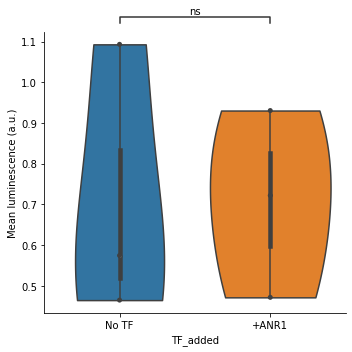

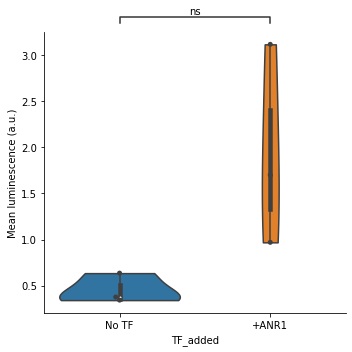

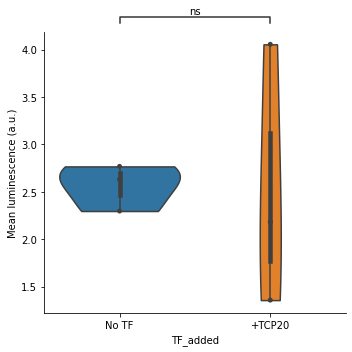

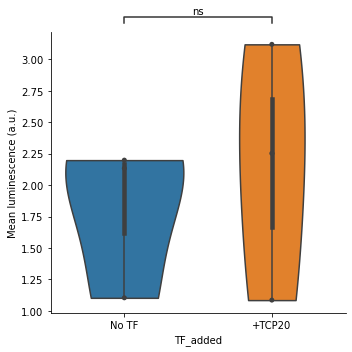

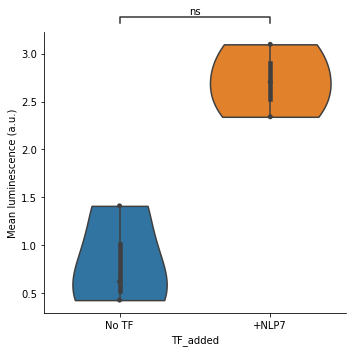

In [41]:
#layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)' )
#make graphs for each promoter
#color_discrete_map = {'red': 'red', 'blue': 'blue', 'orange': 'orange', 'purple':'purple','green':'green','yellow':'yellow','brown':'brown','black':'black'}
#plots for promoters 2 Tf categories

for prom in prom_names:
    if prom == 'NOS' or prom == 'minimal_STAP4' or prom is '1xTCP20+NLP7' or prom is '4xNLP7' or prom is '4xNRE' or prom is '4xTCP20+NLP7' or prom is 'UBQ10':
        pass
    else:
        df = luminescence_raw_df[luminescence_raw_df.Promoter == prom].sort_values("TF_added", ascending=False)
        TFs =  df.TF_added.unique()
        order = [TFs[0],TFs[1]]
        fig = sns.catplot(
            x='TF_added',
            y='corrected_luminescence',
            data=df,
            kind='violin',
            order=order,            
            cut=0,
            legend=False,
            #color=new_color
        )
        ax = sns.swarmplot(x='TF_added', y='corrected_luminescence', data=df, color=".25", order=order)
        #fig = px.violin(df, x='TF_added',
         #                         y='corrected_luminescence', box=True,                       
          #                      color='TF_added', color_discrete_map=new_color,violinmode='overlay',order=order) #points="all"

        #fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)', title=prom,autosize=True)
        #fig.update_xaxes(showline=True, linewidth=1, linecolor='black',ticks="outside")
        #fig.update_yaxes(showline=True, linewidth=1, linecolor='black',ticks="outside", title_text='Mean luminescence (a.u.)')
        #hide legend
        #fig.layout.update(showlegend=False)
         # add significance if necessary - dunn's posthocs with multiple Bonferroni correction
        #stat = dunn_posthoc_test(df, 'corrected_luminescence', 'TF_added')
        # label box pairs        
        box_pairs = [(TFs[0],TFs[1])]
        # make empty list of p_values
        p_values = []
        # populate the list of p_values according to the box_pairs
        # for pair in box_pairs:
        #     print(pair)
        #     # select p value for each pair
        #     p = stat.loc[pair[0], pair[1]]
        #     p_values.append(p)

        # add stats annotation to the plot
        add_stat_annotation(
            ax,
            data=df,
            x='TF_added',
            y='corrected_luminescence',
            order=order,
            box_pairs=box_pairs,
            text_format="star",
            loc="outside",
            verbose=2,
            #perform_stat_test=False,
            #pvalues=p_values,
            test='Mann-Whitney',
        )
        # change axes labels
        plt.ylabel('Mean luminescence (a.u.)')
        #plt.xlabel(x_label)
        # tight layout
        plt.tight_layout()
        # save figure
        ax.get_figure().savefig(
            f'../../../../data/plots/luminescence/{finaldate}/violin{prom}.pdf',
            format="pdf",
    )


        #write to file static image and interactive one
       # fig.write_image(f'../../../../data/plots/luminescence/{finaldate}/violin{prom}.pdf', width=500, height=350, scale=5)
      #  fig.write_html(f'../../../../data/plots/luminescence/{finaldate}/violin{prom}.html')
      #  fig.show()

('No TF', '+TCP20')
('No TF', '+NLP7+TCP20')
('No TF', '+NLP7')
('+TCP20', '+NLP7+TCP20')
('+TCP20', '+NLP7')
('+NLP7+TCP20', '+NLP7')
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No TF v.s. +TCP20: Custom statistical test, P_val:1.000e+00
+TCP20 v.s. +NLP7+TCP20: Custom statistical test, P_val:1.000e+00
+NLP7+TCP20 v.s. +NLP7: Custom statistical test, P_val:3.255e-01
No TF v.s. +NLP7+TCP20: Custom statistical test, P_val:7.643e-02
+TCP20 v.s. +NLP7: Custom statistical test, P_val:1.000e+00
No TF v.s. +NLP7: Custom statistical test, P_val:1.000e+00
('No TF', '+TCP20')
('No TF', '+NLP7+TCP20')
('No TF', '+NLP7')
('+TCP20', '+NLP7+TCP20')
('+TCP20', '+NLP7')
('+NLP7+TCP20', '+NLP7')
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No TF v.s. +TCP20: Custom s

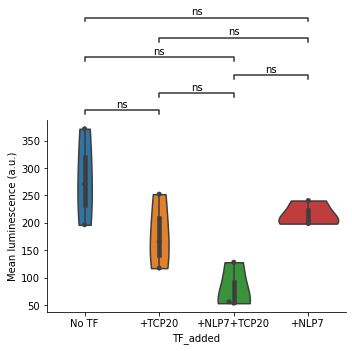

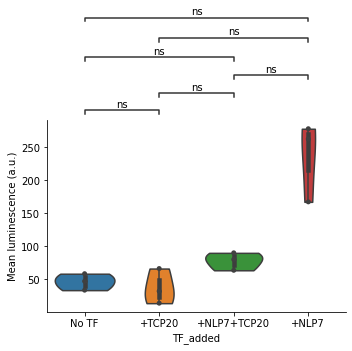

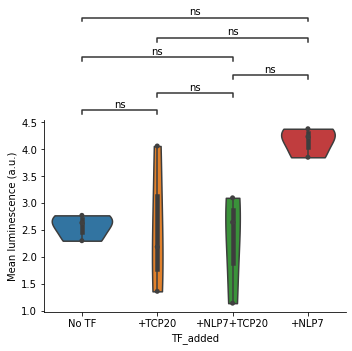

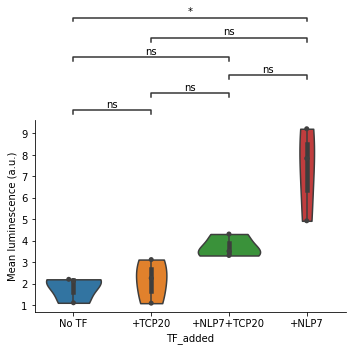

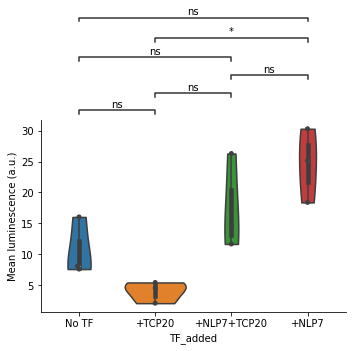

In [42]:
#layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)' )
#make graphs for each promoter
#color_discrete_map = {'red': 'red', 'blue': 'blue', 'orange': 'orange', 'purple':'purple','green':'green','yellow':'yellow','brown':'brown','black':'black'}
#plots for promoters with more than 2 Tf categories

for prom in prom_names:
    if prom == 'NOS' or prom == 'minimal_STAP4' or prom is '1xANR1' or prom is '1xNLP7' or prom is '4xANR1':
        pass
    else:
        df = luminescence_raw_df[luminescence_raw_df.Promoter == prom].sort_values("TF_added", ascending=False)
        TFs =  df.TF_added.unique()
        order = [TFs[0],TFs[1],TFs[2],TFs[3]]
        fig = sns.catplot(
            x='TF_added',
            y='corrected_luminescence',
            data=df,
            kind='violin',
            order=order,            
            cut=0,
            legend=False,
            #color=new_color
        )
        ax = sns.swarmplot(x='TF_added', y='corrected_luminescence', data=df, color=".25", order=order)
        #fig = px.violin(df, x='TF_added',
         #                         y='corrected_luminescence', box=True,                       
          #                      color='TF_added', color_discrete_map=new_color,violinmode='overlay',order=order) #points="all"

        #fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)', title=prom,autosize=True)
        #fig.update_xaxes(showline=True, linewidth=1, linecolor='black',ticks="outside")
        #fig.update_yaxes(showline=True, linewidth=1, linecolor='black',ticks="outside", title_text='Mean luminescence (a.u.)')
        #hide legend
        #fig.layout.update(showlegend=False)
         # add significance if necessary - dunn's posthocs with multiple Bonferroni correction
        stat = dunn_posthoc_test(df, 'corrected_luminescence', 'TF_added')
        # label box pairs        
        box_pairs = [(TFs[0],TFs[1]), (TFs[0],TFs[2]),(TFs[0],TFs[3]), (TFs[1],TFs[2]),(TFs[1],TFs[3]),(TFs[2],TFs[3])]
        # make empty list of p_values
        p_values = []
        # populate the list of p_values according to the box_pairs
        for pair in box_pairs:
            print(pair)
            # select p value for each pair
            p = stat.loc[pair[0], pair[1]]
            p_values.append(p)

        # add stats annotation to the plot
        add_stat_annotation(
            ax,
            data=df,
            x='TF_added',
            y='corrected_luminescence',
            order=order,
            box_pairs=box_pairs,
            text_format="star",
            loc="outside",
            verbose=2,
            perform_stat_test=False,
            pvalues=p_values,
            test_short_name="Dunn",
        )
        # change axes labels
        plt.ylabel('Mean luminescence (a.u.)')
        #plt.xlabel(x_label)
        # tight layout
        plt.tight_layout()
        # save figure
        ax.get_figure().savefig(
            f'../../../../data/plots/luminescence/{finaldate}/violin{prom}.pdf',
            format="pdf",
    )


        #write to file static image and interactive one
       # fig.write_image(f'../../../../data/plots/luminescence/{finaldate}/violin{prom}.pdf', width=500, height=350, scale=5)
      #  fig.write_html(f'../../../../data/plots/luminescence/{finaldate}/violin{prom}.html')
      #  fig.show()

In [43]:
for TF in names:
    print(TF)

No TF
+TCP20
+NLP7+TCP20
+NLP7
+ANR1


In [71]:
# #layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)' )
# fig = go.Figure(go.Violin(y=luminescence_raw_df[luminescence_raw_df.Promoter == 'ANR1'].corrected_luminescence, x=luminescence_raw_df[luminescence_raw_df.Promoter == 'ANR1'].TF_added,
#                           fillcolor='#840122', box_visible=True, meanline_visible=True))
#               #points="all"

# fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
# fig.update_xaxes(showline=True, linewidth=1, linecolor='black',ticks="outside")
# fig.update_yaxes(showline=True, linewidth=1, linecolor='black',ticks="outside", title_text='Mean luminescence (a.u.)')
# #write to file static image and interactive one
# #fig.write_image(f'../../../../data/plots/luminescence/{date}/violin23.9.19.pdf')
# #fig.write_html(f'../../../../data/plots/luminescence/{date}/violin23.9.19.html')

# fig.show()

### test normality

In [72]:
#returns test statistic, p-value
for name1 in prom_names:
    for name in names:
        print(name1,'{}: {}'.format(name, stats.shapiro(luminescence_raw_df['nluc/fluc'][luminescence_raw_df.TF_added == name])))


NOS No TF: ShapiroResult(statistic=0.5684894323348999, pvalue=3.075316001854844e-08)
NOS +TCP20: ShapiroResult(statistic=0.6559027433395386, pvalue=8.715975127415732e-05)
NOS +NLP7+TCP20: ShapiroResult(statistic=0.832866907119751, pvalue=0.010025880299508572)
NOS +NLP7: ShapiroResult(statistic=0.7143738865852356, pvalue=0.00011790679127443582)
NOS +ANR1: ShapiroResult(statistic=0.8291610479354858, pvalue=0.10574325174093246)
minimal_STAP4 No TF: ShapiroResult(statistic=0.5684894323348999, pvalue=3.075316001854844e-08)
minimal_STAP4 +TCP20: ShapiroResult(statistic=0.6559027433395386, pvalue=8.715975127415732e-05)
minimal_STAP4 +NLP7+TCP20: ShapiroResult(statistic=0.832866907119751, pvalue=0.010025880299508572)
minimal_STAP4 +NLP7: ShapiroResult(statistic=0.7143738865852356, pvalue=0.00011790679127443582)
minimal_STAP4 +ANR1: ShapiroResult(statistic=0.8291610479354858, pvalue=0.10574325174093246)
UBQ10 No TF: ShapiroResult(statistic=0.5684894323348999, pvalue=3.075316001854844e-08)
UBQ10

#### not normal

In [83]:
luminescence_raw_df

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,nluc/fluc,date,Promoter,TF_added,corrected_luminescence
1,B,1,Sample X2,52333.0,3196937.0,35+34,Co-expression,61.088357,27.11.20,NOS,No TF,58.124607
9,B,2,Sample X10,12157.0,1963686.0,35+34,Co-expression,161.527186,27.11.20,NOS,No TF,153.690567
17,B,3,Sample X18,18386.0,1704039.0,35+34,Co-expression,92.681334,27.11.20,NOS,No TF,88.184826
2,C,1,Sample X3,180846.0,139255.0,102+34,Co-expression,0.770020,27.11.20,minimal_STAP4,No TF,0.732662
10,C,2,Sample X11,55755.0,24776.0,102+34,Co-expression,0.444373,27.11.20,minimal_STAP4,No TF,0.422814
...,...,...,...,...,...,...,...,...,...,...,...,...
64,A,9,Sample X65,9321.0,246446.0,107+29+34,Co-expression,26.439867,27.11.20,4xNLP7,+NLP7,25.157116
56,A,8,Sample X57,14505.0,461986.0,107+29+34,Co-expression,31.850121,27.11.20,4xNLP7,+NLP7,30.304887
57,B,8,Sample X58,19385.0,535792.0,107+111+29+34,Co-expression,27.639515,27.11.20,4xNLP7,+NLP7+TCP20,26.298562
23,H,3,Sample X24,18249.0,146027.0,107+34,Co-expression,8.001918,27.11.20,4xNLP7,No TF,7.613699


In [82]:
#test variance
stats.levene(luminescence_raw_df['nluc/fluc'][luminescence_raw_df.TF_added == names[0]], 
               luminescence_raw_df['nluc/fluc'][luminescence_raw_df.TF_added == names[1]])

LeveneResult(statistic=0.0014254011689854634, pvalue=0.9700581717907406)

In [84]:
test = luminescence_raw_df.groupby('Promoter')

In [85]:
test

# one-way ANOVA: scipy.stats.kruskal

In [86]:
for name in names:
    print(name)

No TF
+TCP20
+NLP7+TCP20
+NLP7
+ANR1


In [79]:
#luminescence anova
for promoter, value in test:
    if promoter == '1xANR1':
        print(promoter)     
        print(stats.f_oneway(value['corrected_luminescence'][value.TF_added == 'None'],
                value['corrected_luminescence'][value.TF_added == 'ANR1'],
                ))
    if promoter == '1xNLP7':
        print(promoter)     
        print(stats.f_oneway(value['corrected_luminescence'][value.TF_added == 'None'],
                value['corrected_luminescence'][value.TF_added == 'NLP7'],                
    if promoter == '1xTCP20+NLP7':
        print(promoter)     
        print(stats.f_oneway(value['corrected_luminescence'][value.TF_added == 'None'],
                value['corrected_luminescence'][value.TF_added == 'NLP7'],
                value['corrected_luminescence'][value.TF_added == 'NLP7+TCP20'],
                value['corrected_luminescence'][value.TF_added == 'TCP20']))
    if promoter == '4xANR1':
        print(promoter)     
        print(stats.f_oneway(value['corrected_luminescence'][value.TF_added == 'None'],
                value['corrected_luminescence'][value.TF_added == 'ANR1'],                
                ))
    if promoter == '4xNLP7':
        print(promoter)     
        print(stats.f_oneway(value['corrected_luminescence'][value.TF_added == 'None'],                
                value['corrected_luminescence'][value.TF_added == 'NLP7'],
               ))
    if promoter == '4xTCP20+NLP7':
        print(promoter)     
        print(stats.f_oneway(value['corrected_luminescence'][value.TF_added == 'None'],
                value['corrected_luminescence'][value.TF_added == 'NLP7'],
                value['corrected_luminescence'][value.TF_added == 'NLP7+TCP20'],
                value['corrected_luminescence'][value.TF_added == 'TCP20']))
    
    if promoter == '4xNRE':
            
            print(promoter)     
            print(stats.f_oneway(value['corrected_luminescence'][value.TF_added == 'None'],
                value['corrected_luminescence'][value.TF_added == 'NLP7'],
                value['corrected_luminescence'][value.TF_added == 'NLP7+TCP20'],
                value['corrected_luminescence'][value.TF_added == 'TCP20']))
    if promoter == 'UBQ10':
            
        print(promoter)     
        print(stats.f_oneway(value['corrected_luminescence'][value.TF_added == 'None'],
            value['corrected_luminescence'][value.TF_added == 'NLP7'],
                value['corrected_luminescence'][value.TF_added == 'NLP7+TCP20'],
                value['corrected_luminescence'][value.TF_added == 'TCP20']))        


SyntaxError: invalid syntax (<ipython-input-79-bbc83ea60bb9>, line 12)

In [88]:
df = luminescence_raw_df
#First rerun NIR1 it as a GLM
NIR1 = df[df.Promoter == 'NIR1']  
results = ols('corrected_luminescence ~ C(TF_added)', data=NIR1).fit()
results.summary()



ValueError: negative dimensions are not allowed

In [40]:
# #make anova table for NIR1
# aov_table = sm.stats.anova_lm(results, typ=2)
# aov_table

In [41]:
# #pairwise tukey posthoc test for NIR1

    
# mc = MultiComparison(NIR1['corrected_luminescence'], NIR1['TF_added'])
# mc_results = mc.tukeyhsd()
# print(mc_results)

In [42]:
# rp.summary_cont(NIR1['corrected_luminescence'].groupby(NIR1['TF_added']))

,N,Mean,SD,SE,95% Conf.,Interval
TF_added,,,,,,
DREB26,6,0.786273,0.192252,0.078487,0.617757,0.954790
NLP6,6,13.565373,5.492719,2.242393,8.750792,18.379953
NLP6+NLP7,3,30.705230,14.565166,8.409202,10.518940,50.891519
NLP6+NLP7+DREB26,6,20.125448,10.267389,4.191644,11.125685,29.125212
NLP7,6,22.538907,10.482721,4.279553,13.350397,31.727418
None,3,0.964554,0.570550,0.329407,0.173812,1.755295


In [41]:
df = luminescence_raw_df.copy()
ANR1_1x = df[df.Promoter == '1xANR1']
rp.summary_cont(ANR1_1x['corrected_luminescence'].groupby(ANR1_1x['TF_added']))


,N,Mean,SD,SE,95% Conf.,Interval
TF_added,,,,,,
+ANR1,3,0.707977,0.229750,0.132646,0.389560,1.026395
No TF,3,0.710774,0.335624,0.193772,0.245624,1.175925


In [42]:
ANR1_4x = df[df.Promoter == '4xANR1']
rp.summary_cont(ANR1_4x['corrected_luminescence'].groupby(ANR1_4x['TF_added']))

,N,Mean,SD,SE,95% Conf.,Interval
TF_added,,,,,,
+ANR1,3,1.928163,1.089834,0.629216,0.417730,3.438596
No TF,3,0.453610,0.159774,0.092245,0.232175,0.675045


In [43]:
prom = '1xNLP7'
prom_df = df[df.Promoter == prom]
rp.summary_cont(prom_df['corrected_luminescence'].groupby(prom_df['TF_added']))

,N,Mean,SD,SE,95% Conf.,Interval
TF_added,,,,,,
+NLP7,3,2.714819,0.378665,0.218622,2.190016,3.239622
No TF,3,0.817929,0.521923,0.301332,0.094581,1.541277


In [44]:
prom = '4xNLP7'
prom_df = df[df.Promoter == prom]
rp.summary_cont(prom_df['corrected_luminescence'].groupby(prom_df['TF_added']))

,N,Mean,SD,SE,95% Conf.,Interval
TF_added,,,,,,
+NLP7,3,24.617559,5.975405,3.449902,16.336070,32.899047
+NLP7+TCP20,3,17.508196,7.747774,4.473179,6.770329,28.246062
+TCP20,3,4.034501,1.733660,1.000929,1.631772,6.437231
No TF,3,10.586391,4.734570,2.733505,4.024612,17.148170


In [45]:
prom = '1xTCP20+NLP7'
prom_df = df[df.Promoter == prom]
rp.summary_cont(prom_df['corrected_luminescence'].groupby(prom_df['TF_added']))

,N,Mean,SD,SE,95% Conf.,Interval
TF_added,,,,,,
+NLP7,3,4.151848,0.273752,0.158051,3.772447,4.531249
+NLP7+TCP20,3,2.290543,1.024754,0.591642,0.870306,3.710779
+TCP20,3,2.532445,1.383544,0.798790,0.614950,4.449939
No TF,3,2.565297,0.242209,0.139839,2.229612,2.900981


In [46]:
prom = '4xTCP20+NLP7'
prom_df = df[df.Promoter == prom]
rp.summary_cont(prom_df['corrected_luminescence'].groupby(prom_df['TF_added']))

,N,Mean,SD,SE,95% Conf.,Interval
TF_added,,,,,,
+NLP7,3,7.329045,2.191713,1.265386,4.291485,10.366605
+NLP7+TCP20,3,3.709872,0.530721,0.306412,2.974329,4.445414
+TCP20,3,2.152670,1.020857,0.589392,0.737835,3.567505
No TF,3,1.812175,0.614407,0.354728,0.960650,2.663700


In [47]:
prom = '4xNRE'
prom_df = df[df.Promoter == prom]
rp.summary_cont(prom_df['corrected_luminescence'].groupby(prom_df['TF_added']))

,N,Mean,SD,SE,95% Conf.,Interval
TF_added,,,,,,
+NLP7,3,236.191743,60.027672,34.656993,152.997634,319.385852
+NLP7+TCP20,3,78.016084,13.347123,7.705965,59.517916,96.514253
+TCP20,3,37.418887,26.638488,15.379738,0.499826,74.337948
No TF,3,46.418754,12.477062,7.203635,29.126428,63.711080


In [106]:
for promoter, value in test:
    print(promoter)
    print(kruskal(data=df[df.Promoter == promoter], dv='corrected_luminescence', between='TF_added'))
    print('')
    

NOS
           Source  ddof1    H  p-unc
Kruskal  TF_added      0  0.0    NaN

minimal_STAP4
           Source  ddof1    H  p-unc
Kruskal  TF_added      0  0.0    NaN

UBQ10
           Source  ddof1         H    p-unc
Kruskal  TF_added      3  6.897436  0.07524

4xNRE
           Source  ddof1        H     p-unc
Kruskal  TF_added      3  8.74359  0.032902

1xANR1
           Source  ddof1         H     p-unc
Kruskal  TF_added      1  0.047619  0.827259

4xANR1
           Source  ddof1         H     p-unc
Kruskal  TF_added      1  3.857143  0.049535

1xTCP20+NLP7
           Source  ddof1         H     p-unc
Kruskal  TF_added      3  5.358974  0.147321

4xTCP20+NLP7
           Source  ddof1         H     p-unc
Kruskal  TF_added      3  9.461538  0.023744

1xNLP7
           Source  ddof1         H     p-unc
Kruskal  TF_added      1  3.857143  0.049535

4xNLP7
           Source  ddof1        H     p-unc
Kruskal  TF_added      3  8.74359  0.032902

NIR1


ZeroDivisionError: division by zero

In [45]:
#run Dunn's post-hoc test
#ANR1
sp.posthoc_dunn(df[df.Promoter == '4xANR1'], val_col='corrected_luminescence', group_col='TF_added', p_adjust='bonferroni')

,ANR1,ARF18,DREB26,NLP7,None
ANR1,-1.000000,1.000000,0.071163,1.000000,1.000000
ARF18,1.000000,-1.000000,1.000000,0.454646,1.000000
DREB26,0.071163,1.000000,-1.000000,0.003175,1.000000
NLP7,1.000000,0.454646,0.003175,-1.000000,0.535796
None,1.000000,1.000000,1.000000,0.535796,-1.000000


In [46]:
#NIR1 post-hoc test
sp.posthoc_dunn(df[df.Promoter == 'NIR1'], val_col='corrected_luminescence', group_col='TF_added', p_adjust='bonferroni')

,DREB26,NLP6,NLP6+NLP7,NLP6+NLP7+DREB26,NLP7,None
DREB26,-1.000000,0.537726,0.021630,0.052771,0.017535,1.000000
NLP6,0.537726,-1.000000,1.000000,1.000000,1.000000,1.000000
NLP6+NLP7,0.021630,1.000000,-1.000000,1.000000,1.000000,0.070083
NLP6+NLP7+DREB26,0.052771,1.000000,1.000000,-1.000000,1.000000,0.206551
NLP7,0.017535,1.000000,1.000000,1.000000,-1.000000,0.094729
None,1.000000,1.000000,0.070083,0.206551,0.094729,-1.000000


In [186]:
df

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,nluc/fluc,date,Promoter,TF_added,corrected_luminescence
0,A,1,Sample X1,174269.0,35951920.0,71+34,Co-expression,206.301293,27.11.20,UBQ10,No TF,196.292423
16,A,3,Sample X17,34377.0,9763093.0,71+34,Co-expression,284.000727,27.11.20,UBQ10,No TF,270.222208
8,A,2,Sample X9,76557.0,29898348.0,71+34,Co-expression,390.537090,27.11.20,UBQ10,No TF,371.589875
81,B,12,Sample X82,30171.0,7997612.0,71+111+34,Co-expression,265.076133,27.11.20,UBQ10,+TCP20,252.215755
77,B,11,Sample X78,9761.0,1202474.0,71+111+34,Co-expression,123.191681,27.11.20,UBQ10,+TCP20,117.214940
73,B,10,Sample X74,36212.0,6304531.0,71+111+34,Co-expression,174.100602,27.11.20,UBQ10,+TCP20,165.653974
79,D,11,Sample X80,16191.0,949868.0,71+29+111+34,Co-expression,58.666420,27.11.20,UBQ10,+NLP7+TCP20,55.820172
75,D,10,Sample X76,12375.0,1664517.0,71+29+111+34,Co-expression,134.506424,27.11.20,UBQ10,+NLP7+TCP20,127.980739
83,D,12,Sample X84,16435.0,920642.0,71+29+111+34,Co-expression,56.017159,27.11.20,UBQ10,+NLP7+TCP20,53.299442
78,C,11,Sample X79,6718.0,1401258.0,71+29+34,Co-expression,208.582614,27.11.20,UBQ10,+NLP7,198.463064
